#⏳ Upload the Dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
from statsmodels.graphics.mosaicplot import mosaic
import random
from IPython.display import display

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
from sys import stdout
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from statsmodels.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from statsmodels.graphics.regressionplots import plot_regress_exog
import statsmodels.api as sm

In [ ]:
application_record = pd.read_csv("https://drive.google.com/u/1/uc?id=1B4VrcNJYbiMVPIblCRWYbrpvr-WoWDSz&export=download")
application_record.set_index("ID").head()
application_record = application_record.drop(columns = ["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"])
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,RETIRED,GOT_LOAN
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2,0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2,0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3,Security staff,2,0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff,1,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff,1,0,1


In [ ]:
application_record['RETIRED'].unique()

array([0, 1])

In [ ]:
credit_record = pd.read_csv("https://drive.google.com/u/1/uc?id=11vpY4iRlTV6ZAUCZ-JgHuOiMH9Aow57z&export=download")
credit_record.set_index("ID").head()

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001711,-1,0
5001711,-2,0
5001711,-3,0
5001712,0,C


In [ ]:
# get all the clients ID who have default once in the sampling period (5 stands for had bad debt)
list1 = credit_record.index[credit_record['STATUS'] == '5'].to_list()

def get_unique_values(lst):
    return list(set(lst))

# get unique values
default__client = get_unique_values(list1)

print(default__client)

[106507, 106508, 106509, 106510, 426024, 426025, 426026, 426027, 426028, 426029, 426030, 426031, 426032, 426033, 426034, 426035, 540741, 540742, 540743, 540744, 516182, 516183, 516184, 516185, 516186, 516187, 221283, 221284, 221285, 221286, 221287, 221288, 221289, 221290, 221291, 221292, 221293, 221327, 221328, 221329, 221330, 221331, 221332, 221333, 221334, 221335, 221336, 221337, 221386, 221387, 221388, 221389, 221390, 221391, 221392, 221393, 221394, 221395, 221396, 942319, 942320, 942321, 942322, 942323, 942324, 942325, 581878, 581879, 942326, 942327, 942328, 942329, 942330, 942331, 942332, 942333, 942334, 942335, 942336, 942337, 942338, 942339, 942340, 942341, 942342, 942343, 942344, 942345, 942346, 942347, 942348, 942349, 942350, 942351, 942352, 942353, 942369, 942370, 942371, 942372, 942373, 942374, 942375, 942376, 942377, 942378, 942379, 942380, 942381, 942382, 942383, 942384, 942385, 942386, 942387, 942388, 942389, 942390, 942391, 942392, 942393, 942394, 942395, 942396, 942397,

In [ ]:
application_record['Default'] = application_record.index.isin(default__client).astype(int)
application_record['Default'].unique() # 1 stands for default client, 0 without default

array([0, 1])

In [ ]:
# create a dictionary to map the values
mapping = {1: "Y", 0: "N"}

# change the values in the columns
columns = ["RETIRED", "GOT_LOAN", "Default"]

application_record[columns] = application_record[columns].replace(mapping)

In [ ]:
application_record['RETIRED'].unique()

array(['N', 'Y'], dtype=object)

#⭕ Missing Values

In [ ]:
# % of values missing in each column

# define a function to show the missing values
def pct_missing_values(dataframe):
  values_list = list()
  cols_list = list()
  for col in dataframe.columns:
    pct_missing = np.mean(dataframe[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
  pct_missing_df = pd.DataFrame()
  pct_missing_df['col'] = cols_list
  pct_missing_df['pct_missing'] = values_list
  # sort the column by the pct of missing values 
  pct_missing_df = pct_missing_df.sort_values(by="pct_missing", ascending=True)
  # Create bars
  plt.barh(pct_missing_df['col'], pct_missing_df['pct_missing'])
  # Create names on the y-axis
  plt.yticks(pct_missing_df['col'])
  plt.title(f"Percentage of missing values")
  plt.rcParams['figure.figsize'] = [10, 8]
  # Show graphic of pct of missing values
  plt.show()

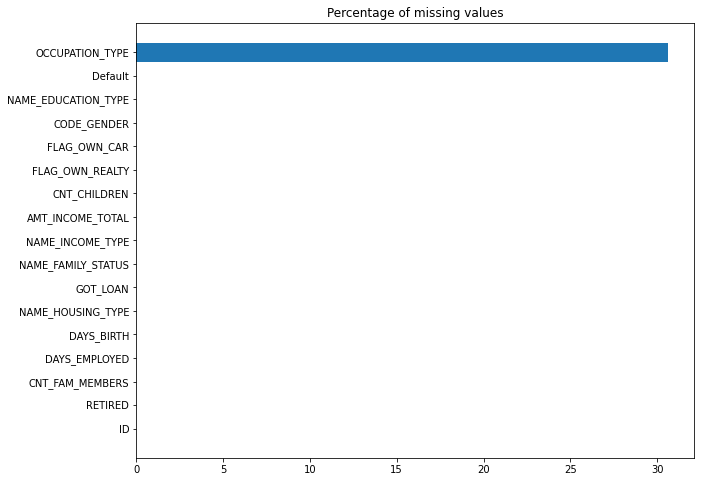

In [ ]:
pct_missing_values(application_record)

In [ ]:
# dropna values
application_record.dropna(inplace=True)

In [ ]:
# drop the unnecessary columns in the dataframe
dataframe = application_record.copy()
dataframe.rename(columns={"DAYS_BIRTH": "YEARS_BIRTH", "DAYS_EMPLOYED": "YEARS_EMPLOYED"}, inplace=True)


In [ ]:
dataframe['RETIRED'].unique()
dataframe.drop(columns = 'RETIRED')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,GOT_LOAN,Default
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3,Security staff,2,Y,N
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff,1,Y,N
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff,1,Y,N
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff,1,Y,N
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff,1,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,37,6,Laborers,2,N,N
438548,6839936,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,34,5,Laborers,3,N,N
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,43,8,Laborers,1,N,N
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22,1,Sales staff,1,N,N


In [ ]:
# replace the maximun year 100(which means retired) to 48 years
dataframe['YEARS_EMPLOYED'] = dataframe['YEARS_EMPLOYED'].replace(100, 48)


###⏭ Data Visualization for Distribution

In [ ]:
# find the categorical variables
def segmentation_categorical(dataframe):  
  # part 1: select categorical variables to plot the stacked bar chart
  df_non_numeric = dataframe.select_dtypes(exclude=[np.number]) 
  label_list = []
  cols_list = []
  for col in df_non_numeric.columns:
    label = pd.unique(df_non_numeric[col])
    cols_list.append(col)
    label_list.append(label)
  segmentation_categorical = pd.DataFrame()
  segmentation_categorical.index = cols_list
  segmentation_categorical['label'] = label_list
  return segmentation_categorical,df_non_numeric

df,df_non_numeric = segmentation_categorical(dataframe)
df

,label
CODE_GENDER,"[M, F]"
FLAG_OWN_CAR,"[Y, N]"
FLAG_OWN_REALTY,"[Y, N]"
NAME_INCOME_TYPE,"[Working, Commercial associate, State servant,..."
NAME_EDUCATION_TYPE,"[Secondary / secondary special, Higher educati..."
NAME_FAMILY_STATUS,"[Married, Single / not married, Civil marriage..."
NAME_HOUSING_TYPE,"[House / apartment, Rented apartment, Municipa..."
OCCUPATION_TYPE,"[Security staff, Sales staff, Accountants, Lab..."
RETIRED,[N]
GOT_LOAN,"[Y, N]"


In [ ]:
# find the continous variables
def segmentation_continuous(dataframe): 
  df_numeric = dataframe.select_dtypes(include=[np.number]) 
  df_numeric = df_numeric.drop(columns = ["ID"]) 
  label_list = []
  cols_list = []
  for col in df_numeric.columns:
    label = pd.unique(df_numeric[col])
    cols_list.append(col)
    label_list.append(label)
  segmentation_continuous = pd.DataFrame()
  segmentation_continuous.index = cols_list
  segmentation_continuous['label'] = label_list
  
  return segmentation_continuous,df_numeric

df2,df_numeric = segmentation_continuous(dataframe) 
df2

,label
CNT_CHILDREN,"[0, 3, 1, 2, 4, 14, 5, 19, 7, 9, 12]"
AMT_INCOME_TOTAL,"[112500.0, 270000.0, 135000.0, 130500.0, 15750..."
YEARS_BIRTH,"[58, 52, 46, 48, 29, 27, 34, 32, 56, 43, 44, 4..."
YEARS_EMPLOYED,"[3, 8, 2, 4, 5, 12, 19, 14, 13, 6, 17, 29, 7, ..."
CNT_FAM_MEMBERS,"[2, 1, 5, 3, 4, 6, 15, 7, 20, 9, 11, 14]"


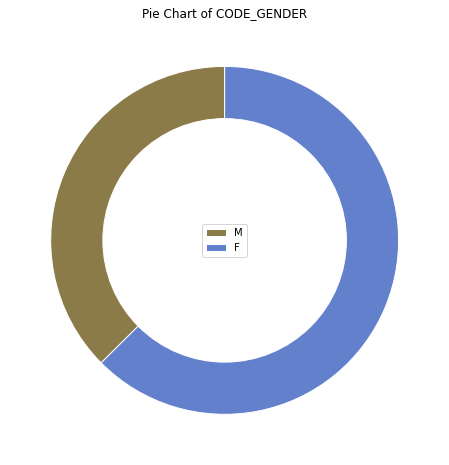

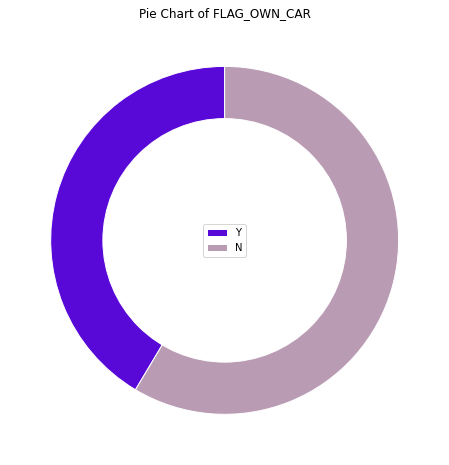

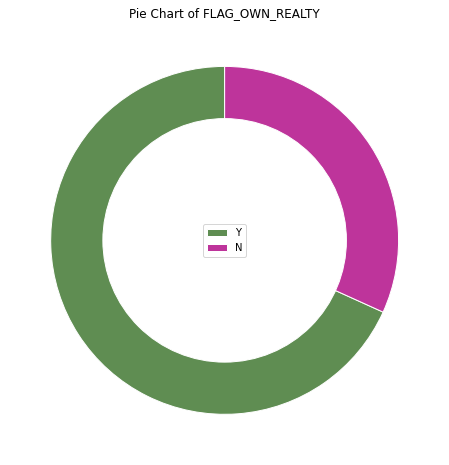

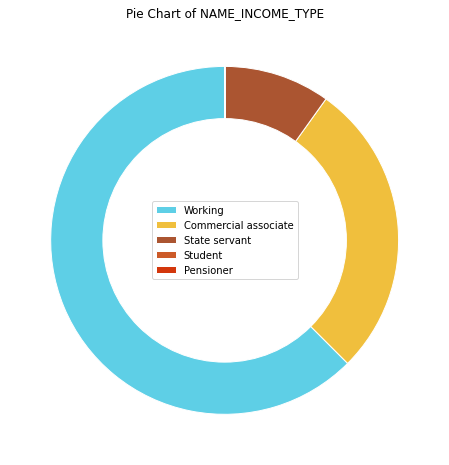

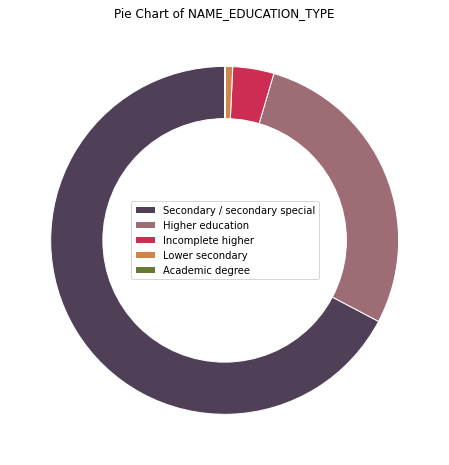

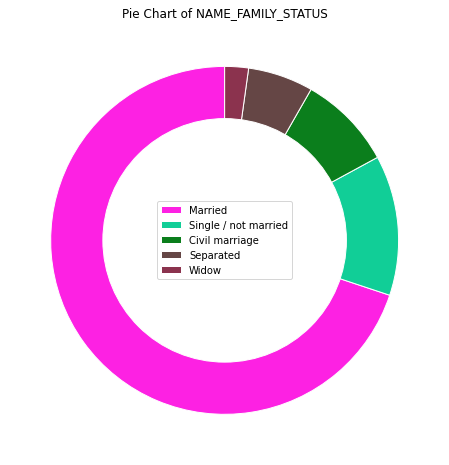

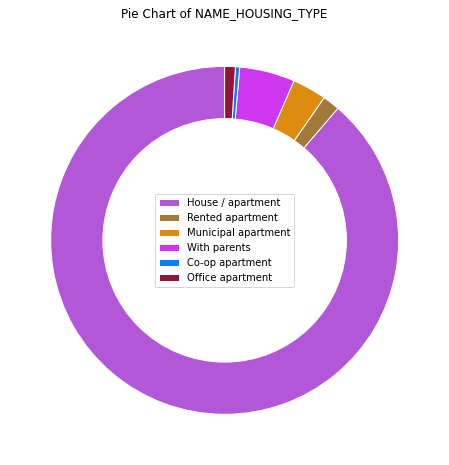

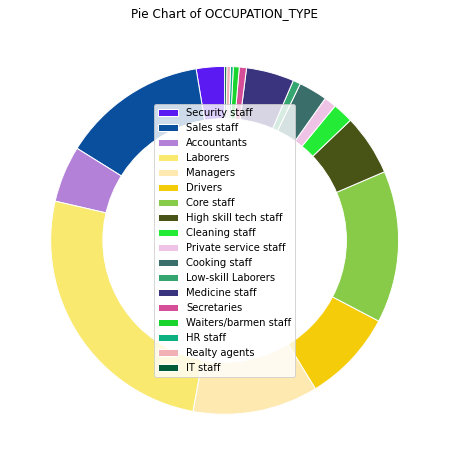

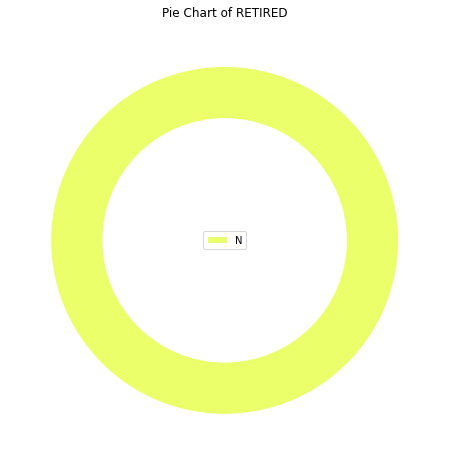

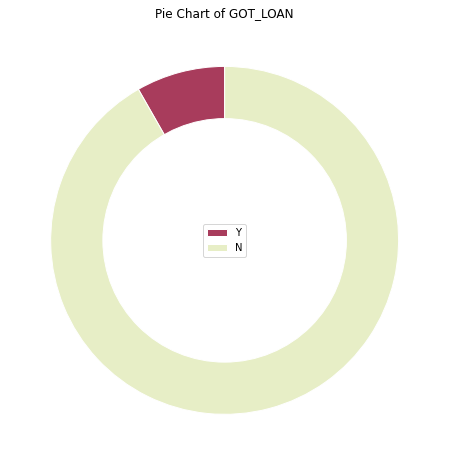

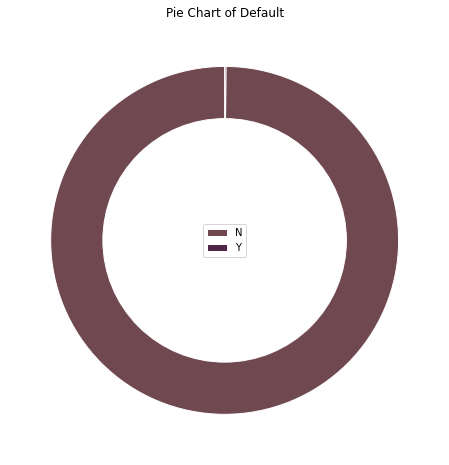

In [ ]:
# part 2: donut plots for categorical variables
# return the label dataframe
for x in df_non_numeric.columns:
  i = df_non_numeric.columns.get_loc(x)

  # Count
  unique_categories = df_non_numeric[x].unique()
  sizes = []
  labels = []
  colors = []
  for unique in unique_categories:
    sizes.append(df_non_numeric[df_non_numeric[x] == unique].shape[0])
    labels.append(unique)
    colors.append((random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))

  
  # Plotting
  fig, ax = plt.subplots()
  y = ax.pie(sizes, colors=colors, startangle=90, radius=1, wedgeprops=dict(width=0.7, edgecolor='w'))
  y = ax.set(aspect="equal", title=f"Pie Chart of {x}")

  # Add circle at the center
  my_circle=plt.Circle( (0,0), 0.7, color='white')
  p=plt.gcf()
  p.gca().add_artist(my_circle)

  # Add legend
  plt.legend(labels, loc="center")
 
  # display(p)

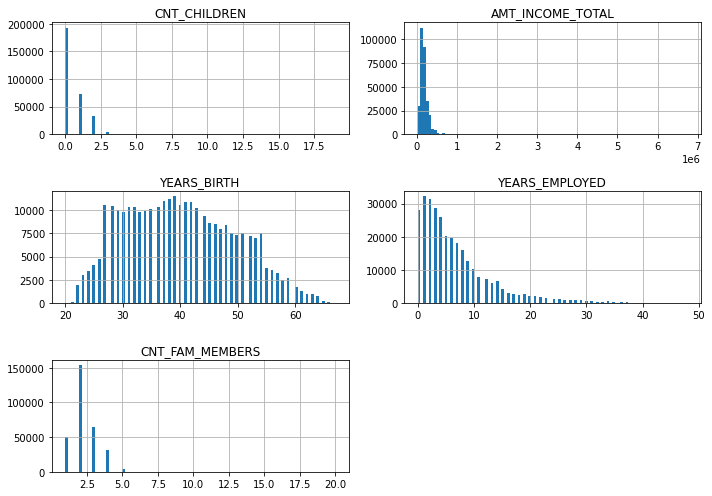

In [ ]:
# plot histograms for all continuous variables
df_numeric.hist(bins=100, figsize=(10,7))
plt.tight_layout()
plt.show()

In [ ]:
df_numeric2 = df_numeric.reset_index(drop=True)
get_def = application_record['Default']
get_def = get_def.reset_index(drop=True)
data_merged1 = pd.concat([get_def, df_non_numeric.drop(columns = "Default"), df_numeric2], ignore_index = True, axis = 1)

columns1 = ['Default','AMT_INCOME_TOTAL','CNT_CHILDREN','CNT_FAM_MEMBERS','CODE_GENDER','FLAG_OWN_CAR',
'FLAG_OWN_REALTY', 'GOT_LOAN', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
'OCCUPATION_TYPE', 'RETIRED', 'YEARS_BIRTH', 'YEARS_EMPLOYED']
data_merged1.columns = columns1

In [ ]:
data_merged1.head()

,Default,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,GOT_LOAN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,RETIRED,YEARS_BIRTH,YEARS_EMPLOYED
0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,112500.0,58.0,3.0,2.0
1,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,270000.0,52.0,8.0,1.0
2,N,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff,N,Y,0.0,270000.0,52.0,8.0,1.0
3,N,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,N,Y,0.0,270000.0,52.0,8.0,1.0
4,N,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,N,Y,0.0,270000.0,52.0,8.0,1.0


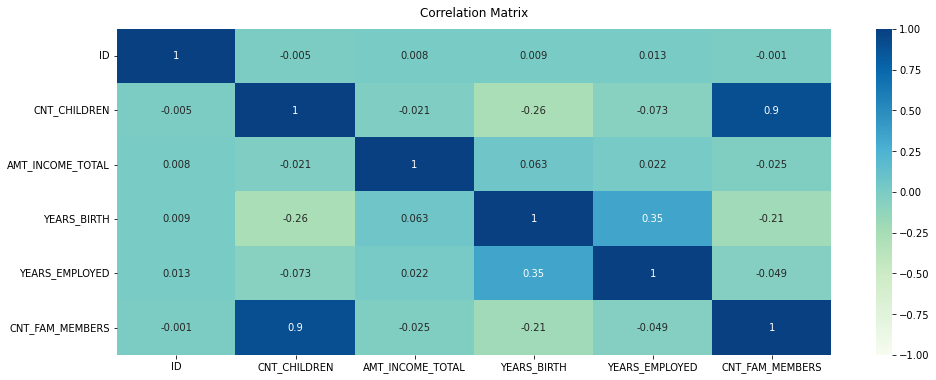

In [ ]:
def plot_heatmat(dataframe):
  # plot the heatmap of correlation map

  plt.figure(figsize=(16, 6))
  # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
  # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
  heatmap = sns.heatmap(round(dataframe.corr(),3), vmin=-1, vmax=1, cmap="GnBu", annot=True)
  # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
  heatmap.set_title('Correlation Matrix', fontdict={'fontsize':12}, pad=12)

plot_heatmat(dataframe)

In [ ]:
#Removing the CNT_CHILDREN because of high correlation with CNT_FAM_MEMBERS

df_numeric2.columns
df_numeric2.drop(columns=['CNT_CHILDREN'])

,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,112500.0,58,3,2
1,270000.0,52,8,1
2,270000.0,52,8,1
3,270000.0,52,8,1
4,270000.0,52,8,1
...,...,...,...,...
304349,202500.0,37,6,2
304350,135000.0,34,5,3
304351,103500.0,43,8,1
304352,54000.0,22,1,1


In [ ]:
dataframe.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,RETIRED,GOT_LOAN,Default
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3,Security staff,2,N,Y,N
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff,1,N,Y,N
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff,1,N,Y,N
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff,1,N,Y,N
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff,1,N,Y,N


In [ ]:
dataframe['RETIRED'].unique()

array(['N'], dtype=object)

In [ ]:
# all remaining data RETIRED = N
df_non_numeric2 = df_non_numeric.drop(columns = ["RETIRED"])

In [ ]:
# standardize all the categorical variables

# change the values of "Incomplete higher", "Lower secondary", "Secondary / secondary special" to "Without higher" in the column of "NAME_EDUCATION_TYPE"
# change the values of "Civil marriage" and "Married" as "Married" in the column of "NAME_FAMILY_STATUS"
# change the values of "Separated", "Single / not married", "Widow", as "Not married" in the column of "NAME_FAMILY_STATUS"

# Replace values in NAME_EDUCATION_TYPE column
df_non_numeric2['NAME_EDUCATION_TYPE'] = df_non_numeric2['NAME_EDUCATION_TYPE'].replace(
    {'Academic degree': 'Higher education',
    'Incomplete higher': 'Without higher',
     'Lower secondary': 'Without higher',
     'Secondary / secondary special': 'Without higher'}
)

# Replace values in NAME_FAMILY_STATUS column
df_non_numeric2['NAME_FAMILY_STATUS'] = df_non_numeric2['NAME_FAMILY_STATUS'].replace(
    {'Civil marriage': 'Married',
     'Married': 'Married',
     'Separated': 'Not married',
     'Single / not married': 'Not married',
     'Widow': 'Not married'}
)



# classify all the values of OCCUPATION_TYPE into three categories
'''[nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff']'''
# 1. Change the values of 'Security staff', 'Sales staff', 'Laborers', 'Drivers', 'Cleaning staff', 'Cooking staff', 'Low-skill Laborers',  'Waiters/barmen staff', 'Secretaries' as "UNSOPHISTICATED LABOR"
# 2. Change the values of as 'Accountants', 'Managers', 'Core staff', 'High skill tech staff', 'Private service staff', 'Medicine staff', 'HR staff', 'Realty agents', 'IT staff' as "SOPHISTICATED LABOR"
# 3. Change the 'nan' as "OTHERS"

def categorize_occupation(occupation):
    unsophisticated_labors = ['Security staff', 'Sales staff', 'Laborers', 'Drivers', 'Cleaning staff', 'Cooking staff', 'Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries']
    sophisticated_labors = ['Accountants', 'Managers', 'Core staff', 'High skill tech staff', 'Private service staff', 'Medicine staff', 'HR staff', 'Realty agents', 'IT staff']
    if occupation in unsophisticated_labors:
        return 'UNSOPHISTICATED LABOR'
    elif occupation in sophisticated_labors:
        return 'SOPHISTICATED LABOR'
    else:
        return 'OTHERS'

# Assume that the data is stored in a pandas dataframe called 'df'
df_non_numeric2['OCCUPATION_TYPE'] = df_non_numeric2['OCCUPATION_TYPE'].apply(categorize_occupation)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# create an encoder and fit the dataframe
enc = OneHotEncoder(sparse=False).fit(df_non_numeric2)
encoded = enc.transform(df_non_numeric2)
# convert it to a dataframe
encoded_df = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)
encoded_df.head()

,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,...,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_SOPHISTICATED LABOR,OCCUPATION_TYPE_UNSOPHISTICATED LABOR,GOT_LOAN_N,GOT_LOAN_Y,Default_N,Default_Y
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
#For variables with n categories, only n-1 variables should be used in the analysis:
encoded_df = encoded_df.drop(columns = ['CODE_GENDER_F', 'FLAG_OWN_CAR_N', 'FLAG_OWN_REALTY_N', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Without higher', 'NAME_FAMILY_STATUS_Not married', 'NAME_HOUSING_TYPE_With parents', 'GOT_LOAN_N'])



In [ ]:
from sklearn.metrics import jaccard_score

def plot_jaccard_heatmap(df):
    column_names = df.columns
    n = len(column_names)
    jaccard_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            jaccard_matrix[i, j] = jaccard_score(df[column_names[i]], df[column_names[j]], average='macro')
    sns.set(rc={'figure.figsize':(15,15)})
    sns.heatmap(jaccard_matrix, annot=True, cmap='Blues')
    plt.xticks(np.arange(n), column_names, rotation=90)
    plt.yticks(np.arange(n)+0.5, column_names, rotation=0)
    plt.show()

plot_jaccard_heatmap(encoded_df)



KeyboardInterrupt: ignored

#⏳ Data Process

In [ ]:
#standardize the values in each column of numeric varaibable
scaler.fit(df_numeric2)
df_numeric_standardized = pd.DataFrame(scaler.transform(df_numeric2))
numeric_cols = df_numeric.columns.values.tolist()
df_numeric_standardized.columns = numeric_cols

In [ ]:
encoded_df.columns

#Remove the columns with high similarity
encoded_df2 = encoded_df.drop(columns= ['FLAG_OWN_CAR_Y', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'Default_N',
       'Default_Y'])

encoded_df2.columns

Index(['CODE_GENDER_M', 'FLAG_OWN_REALTY_Y',
       'NAME_EDUCATION_TYPE_Higher education', 'NAME_FAMILY_STATUS_Married',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment',
       'OCCUPATION_TYPE_SOPHISTICATED LABOR',
       'OCCUPATION_TYPE_UNSOPHISTICATED LABOR', 'GOT_LOAN_Y'],
      dtype='object')

In [ ]:
column_name = ['ID', 'Default', 'CODE_GENDER_F', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
       'NAME_EDUCATION_TYPE_Higher education', 'NAME_FAMILY_STATUS_Married',
       'OCCUPATION_TYPE_SOPHISTICATED LABOR', 'GOT_LOAN_Y', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

In [ ]:
get_cc = application_record[['ID',"Default"]]
print(get_cc)

             ID Default
2       5008806       N
3       5008808       N
4       5008809       N
5       5008810       N
6       5008811       N
...         ...     ...
438541  6837707       N
438548  6839936       N
438553  6840222       N
438554  6841878       N
438556  6842885       N

[304354 rows x 2 columns]


In [ ]:
get_cc['Default'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
encoded_df2 = encoded_df2.reset_index(drop=True)
df_numeric_standardized = df_numeric_standardized.reset_index(drop=True)
X = pd.concat([encoded_df2, df_numeric_standardized], axis=1)

In [ ]:
X

,CODE_GENDER_M,FLAG_OWN_REALTY_Y,NAME_EDUCATION_TYPE_Higher education,NAME_FAMILY_STATUS_Married,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,OCCUPATION_TYPE_SOPHISTICATED LABOR,OCCUPATION_TYPE_UNSOPHISTICATED LABOR,GOT_LOAN_Y,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.667509,-0.704169,1.877279,-0.559341,-0.321784
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.667509,0.642308,1.249340,0.200571,-1.401649
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.667509,0.642308,1.249340,0.200571,-1.401649
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.667509,0.642308,1.249340,0.200571,-1.401649
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.667509,0.642308,1.249340,0.200571,-1.401649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304349,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.667509,0.065247,-0.320509,-0.103394,-0.321784
304350,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.638829,-0.511815,-0.634478,-0.255376,0.758081
304351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.667509,-0.781110,0.307431,0.200571,-1.401649
304352,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.667509,-1.204289,-1.890357,-0.863306,-1.401649


# ⏬ MULTICOLLINEARITY TEST

In [ ]:
# calculate the VIF for each independent variable
X.dropna(inplace = True)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print the VIF for each independent variable
for i, v in enumerate(vif):
    print("VIF for variable {}: {}".format(X.columns[i], v))

# check for multicollinearity
if max(vif) < 5:
    print('No multicollinearity')
else:
    print('Multicollinearity')

VIF for variable CODE_GENDER_M: 1.1314659494214983
VIF for variable FLAG_OWN_REALTY_Y: 1.0484695970381706
VIF for variable NAME_EDUCATION_TYPE_Higher education: 1.1908215786479674
VIF for variable NAME_FAMILY_STATUS_Married: 77.47354427145576
VIF for variable NAME_HOUSING_TYPE_Co-op apartment: 1.0768572382794581
VIF for variable NAME_HOUSING_TYPE_House / apartment: 2.208906319156309
VIF for variable NAME_HOUSING_TYPE_Municipal apartment: 1.6078452277846464
VIF for variable NAME_HOUSING_TYPE_Office apartment: 1.189737809325335
VIF for variable NAME_HOUSING_TYPE_Rented apartment: 1.2912022791938293
VIF for variable OCCUPATION_TYPE_SOPHISTICATED LABOR: 133.29034626419067
VIF for variable OCCUPATION_TYPE_UNSOPHISTICATED LABOR: 175.60084435706054
VIF for variable GOT_LOAN_Y: 1.0005329072545188
VIF for variable CNT_CHILDREN: 269.65347836485114
VIF for variable AMT_INCOME_TOTAL: 1.1116826952895993
VIF for variable YEARS_BIRTH: 1.297649988026272
VIF for variable YEARS_EMPLOYED: 1.1653731879668

In [ ]:
X2 = X.drop(columns = ['CNT_CHILDREN', 'NAME_HOUSING_TYPE_House / apartment', 'OCCUPATION_TYPE_SOPHISTICATED LABOR'])

# calculate the VIF for each independent variable
vif = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# print the VIF for each independent variable
for i, v in enumerate(vif):
    print("VIF for variable {}: {}".format(X2.columns[i], v))

# check for multicollinearity
if max(vif) < 5:
    print('No multicollinearity')
else:
    print('Multicollinearity')

VIF for variable CODE_GENDER_M: 1.7823158713162712
VIF for variable FLAG_OWN_REALTY_Y: 2.581477986890824
VIF for variable NAME_EDUCATION_TYPE_Higher education: 1.4821858768512084
VIF for variable NAME_FAMILY_STATUS_Married: 3.8659510878009704
VIF for variable NAME_HOUSING_TYPE_Co-op apartment: 1.0056458841966356
VIF for variable NAME_HOUSING_TYPE_Municipal apartment: 1.0346916621658517
VIF for variable NAME_HOUSING_TYPE_Office apartment: 1.012189104383513
VIF for variable NAME_HOUSING_TYPE_Rented apartment: 1.02080090127429
VIF for variable OCCUPATION_TYPE_UNSOPHISTICATED LABOR: 2.5107026761429
VIF for variable GOT_LOAN_Y: 1.0801839585271185
VIF for variable AMT_INCOME_TOTAL: 1.1106062687825868
VIF for variable YEARS_BIRTH: 1.238439735040986
VIF for variable YEARS_EMPLOYED: 1.1609552821611093
VIF for variable CNT_FAM_MEMBERS: 1.3301949297703528
No multicollinearity


#⚓ Logit Regression

1.   Logit Regression Fitting
2.   Performance (RMSE, Accuracy Score, AUC-ROC)
3.   Validation (Linearity with log-odds,Pseudo R)



In [ ]:
def logit_regression(Data_raw, name_of_dataframe):
    Data_raw.dropna(inplace = True)

    # split the dataframe into test set and train set
    y = encoded_df['Default_Y']

    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.10, random_state=16)
    # Here, the Dataset is broken into two parts in a ratio of 90:10. 
    # It means 90% data will be used for model training and 10% for model testing.

    # instantiate the model 
    X_train = add_constant(X_train)
    X_test = add_constant(X_test)

    # fit the model with data with L2 penalty to address the overfitting problems
    logit_model  = Logit(y_train, X_train, penalty='l2', alpha=0.1).fit()

    y_train_pred = logit_model.predict(X_train)
    y_train_pred = (y_train_pred > 0.5).astype(int)

    y_test_pred = logit_model.predict(X_test)
    y_test_pred = (y_test_pred > 0.5).astype(int)

    # plot the confustion matrix
    cnf_matrix_train = confusion_matrix(y_train, y_train_pred)
    cnf_matrix_test = confusion_matrix(y_test, y_test_pred)

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap of the test set 
    sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix of Test Set', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    # Calculate the RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    print("Train RMSE:", train_rmse)

    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("Test RMSE:", test_rmse)

    # plot the RUC Curve for the test set
    y_train_pred_proba = logit_model.predict(X_train)
    y_test_pred_proba = logit_model.predict(X_test)
    
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,  y_train_pred_proba)
    train_auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
    print("Train AUC", train_auc)

    fpr_test, tpr_test, _ = metrics.roc_curve(y_test,  y_test_pred_proba)
    test_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("Test AUC", test_auc)

    plt.plot(fpr_test,tpr_test,label=str(name_of_dataframe)+" auc test="+str(round(test_auc,3)))
    plt.title("Test Set ROC Curve for logit regression of "+str(name_of_dataframe))
    plt.legend(loc=4)
    plt.show()

    # check linearity assumption for each independent variable  index = logit_model.pvalues.index[1:]
    pvalues = pd.Series(logit_model.pvalues[1:])
    for i,col in enumerate(pvalues):
      if col < 0.05:
        print('Linearity assumption satisfied for independent variable column {}'.format(i))
      else:
        print('Linearity assumption not satisfied for independent variable column {}'.format(i))
    
    print(logit_model.summary())

    # Get the summary table from the logistic regression model
    summary_table = logit_model.summary().tables[1]

    # Convert the summary table to a Pandas dataframe
    df = pd.read_html(summary_table.as_html(), header=0, index_col=0)[0]

    # Export the dataframe to an Excel file
    df.to_excel('/content/sample_data/summary_table_logit_.xlsx')


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


         Current function value: 0.008964
         Iterations: 35


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


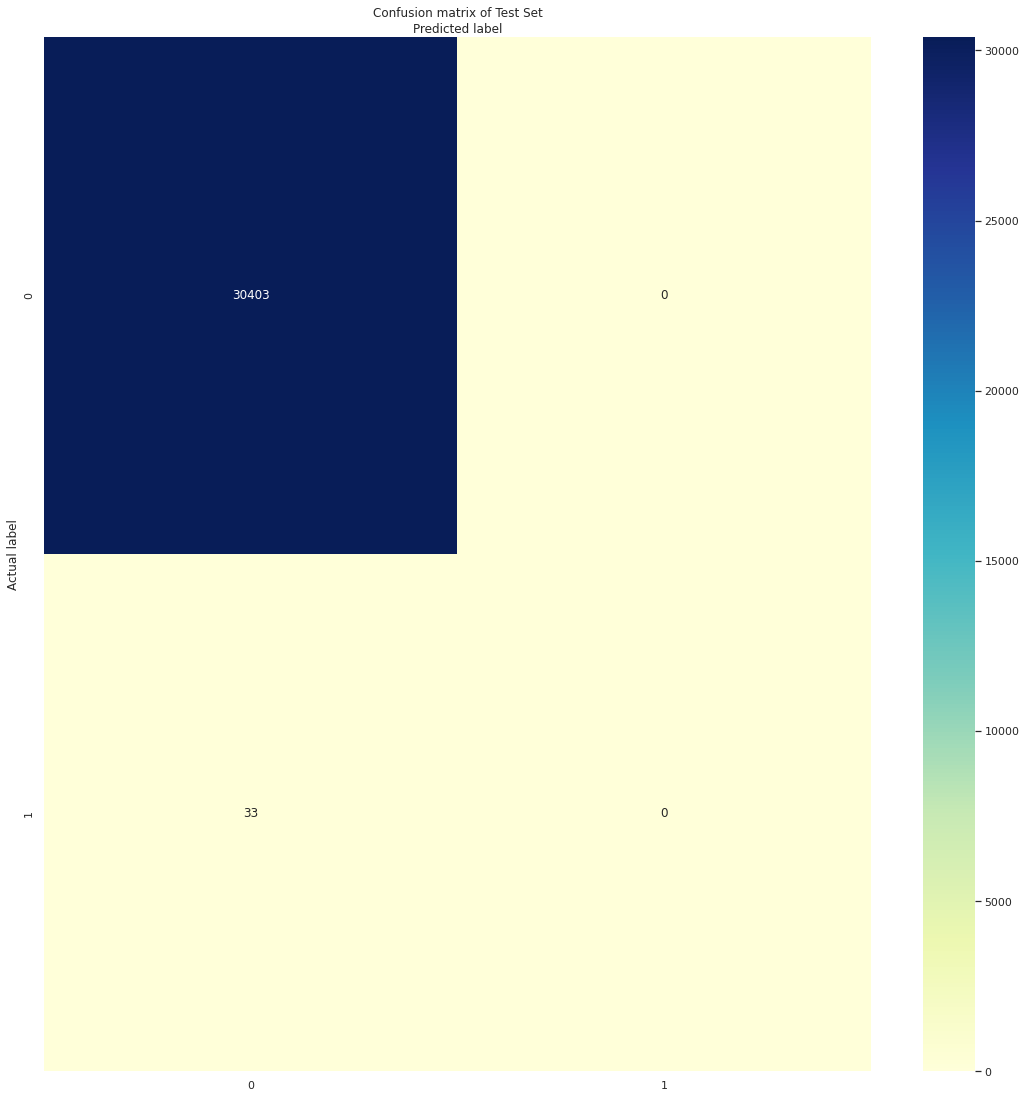

Train RMSE: 0.034179421130305594
Test RMSE: 0.03292783540702198
Train AUC 0.6132150659909794
Test AUC 0.6110596143323177


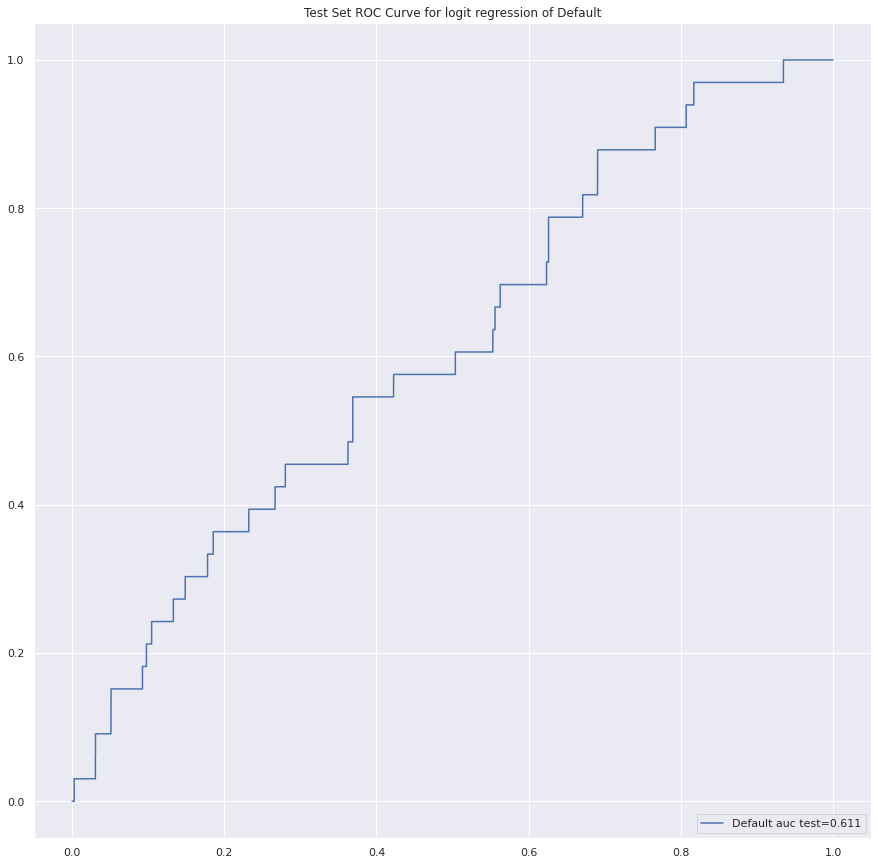

Linearity assumption satisfied for independent variable column 0
Linearity assumption satisfied for independent variable column 1
Linearity assumption satisfied for independent variable column 2
Linearity assumption not satisfied for independent variable column 3
Linearity assumption not satisfied for independent variable column 4
Linearity assumption not satisfied for independent variable column 5
Linearity assumption satisfied for independent variable column 6
Linearity assumption not satisfied for independent variable column 7
Linearity assumption not satisfied for independent variable column 8
Linearity assumption not satisfied for independent variable column 9
Linearity assumption not satisfied for independent variable column 10
Linearity assumption satisfied for independent variable column 11
Linearity assumption satisfied for independent variable column 12
Linearity assumption not satisfied for independent variable column 13
                           Logit Regression Results   

In [ ]:
logit_regression(X2, "Default")

#✅ Probit Regression

1.   Probit Regression Fitting
2.   Performance (RMSE, Accuracy Score, AUC-ROC)
3.   Validation (Linearity with log-odds,Pseudo R)



In [ ]:
def probit_regression(Data_raw, name_of_dataframe):
    Data_raw.dropna(inplace = True)

    # split the dataframe into test set and train set
    y = encoded_df['Default_Y']

    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.10, random_state=16)
    # Here, the Dataset is broken into two parts in a ratio of 90:10. 
    # It means 90% data will be used for model training and 10% for model testing.

    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.10, random_state=16)
    # Here, the Dataset is broken into two parts in a ratio of 90:10. 
    # It means 90% data will be used for model training and 10% for model testing.

    # fit the model with data with L2 penalty to address the overfitting problems
    probit_model  = sm.Probit(y_train, X_train).fit()

    y_train_pred = probit_model.predict(X_train)
    y_train_pred = (y_train_pred > 0.5).astype(int)

    y_test_pred = probit_model.predict(X_test)
    y_test_pred = (y_test_pred > 0.5).astype(int)

    # plot the confustion matrix
    cnf_matrix_train = confusion_matrix(y_train, y_train_pred)
    cnf_matrix_test = confusion_matrix(y_test, y_test_pred)

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap of the test set 
    sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix of Test Set', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    # Calculate the RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    print("Train RMSE:", train_rmse)

    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("Test RMSE:", test_rmse)

    # plot the RUC Curve for the test set
    y_train_pred_proba = probit_model.predict(X_train)
    y_test_pred_proba = probit_model.predict(X_test)
    
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,  y_train_pred_proba)
    train_auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
    print("Train AUC", train_auc)

    fpr_test, tpr_test, _ = metrics.roc_curve(y_test,  y_test_pred_proba)
    test_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("Test AUC", test_auc)

    plt.plot(fpr_test,tpr_test,label=str(name_of_dataframe)+" auc test="+str(round(test_auc,3)))
    plt.title("Test Set ROC Curve for logit regression of "+str(name_of_dataframe))
    plt.legend(loc=4)
    plt.show()

    # check linearity assumption for each independent variable  index = logit_model.pvalues.index[1:]
    pvalues = pd.Series(probit_model.pvalues[1:])
    for i,col in enumerate(pvalues):
      if col < 0.05:
        print('Linearity assumption satisfied for independent variable column {}'.format(i))
      else:
        print('Linearity assumption not satisfied for independent variable column {}'.format(i))
    
    print(probit_model.summary())

    # Get the summary table from the logistic regression model
    summary_table = probit_model.summary().tables[1]

    # Convert the summary table to a Pandas dataframe
    df = pd.read_html(summary_table.as_html(), header=0, index_col=0)[0]

    # Export the dataframe to an Excel file
    df.to_excel('/content/sample_data/summary_table_probit.xlsx')

         Current function value: 0.022049
         Iterations: 35


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


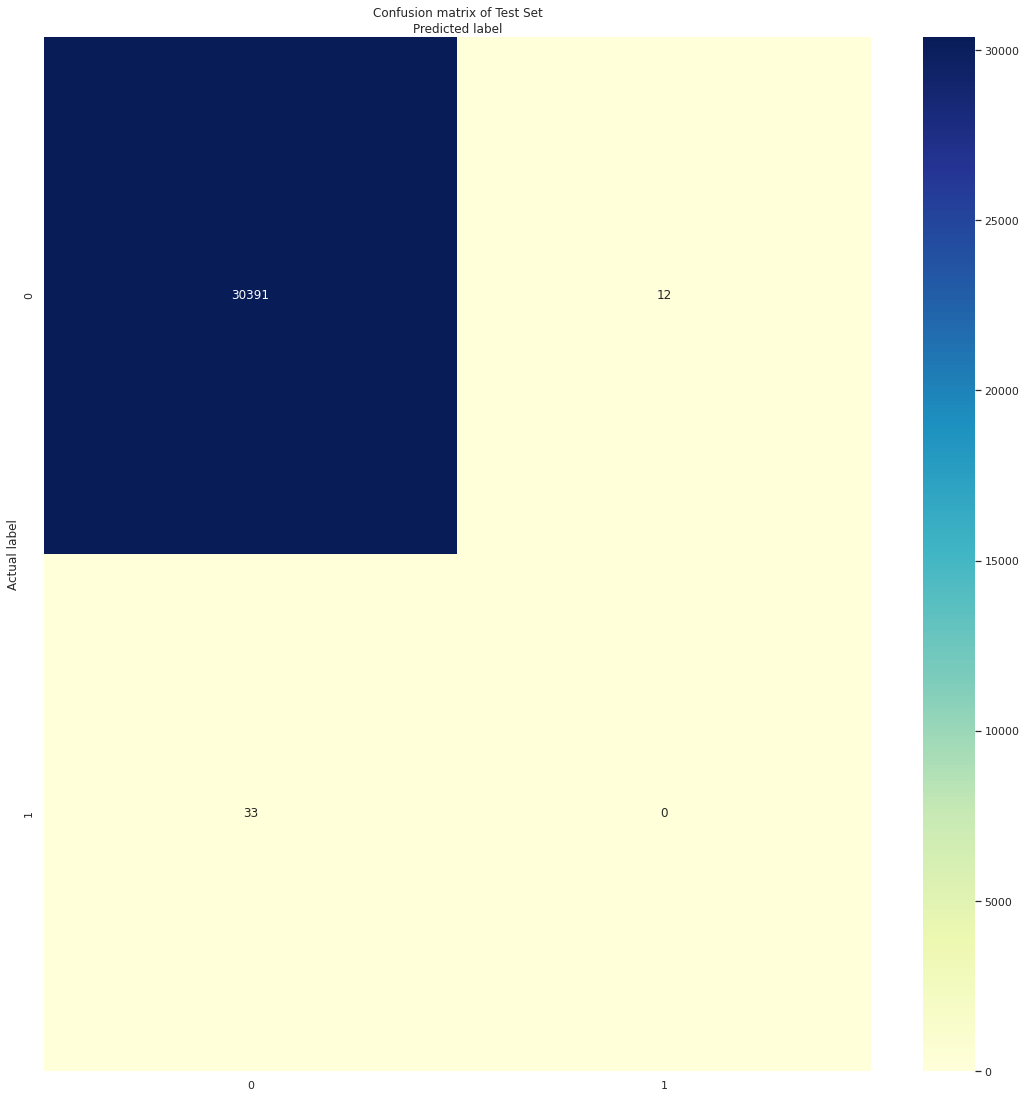

Train RMSE: 0.04319168668267587
Test RMSE: 0.03845142764683654
Train AUC 0.4574013698930548
Test AUC 0.3948130118738282


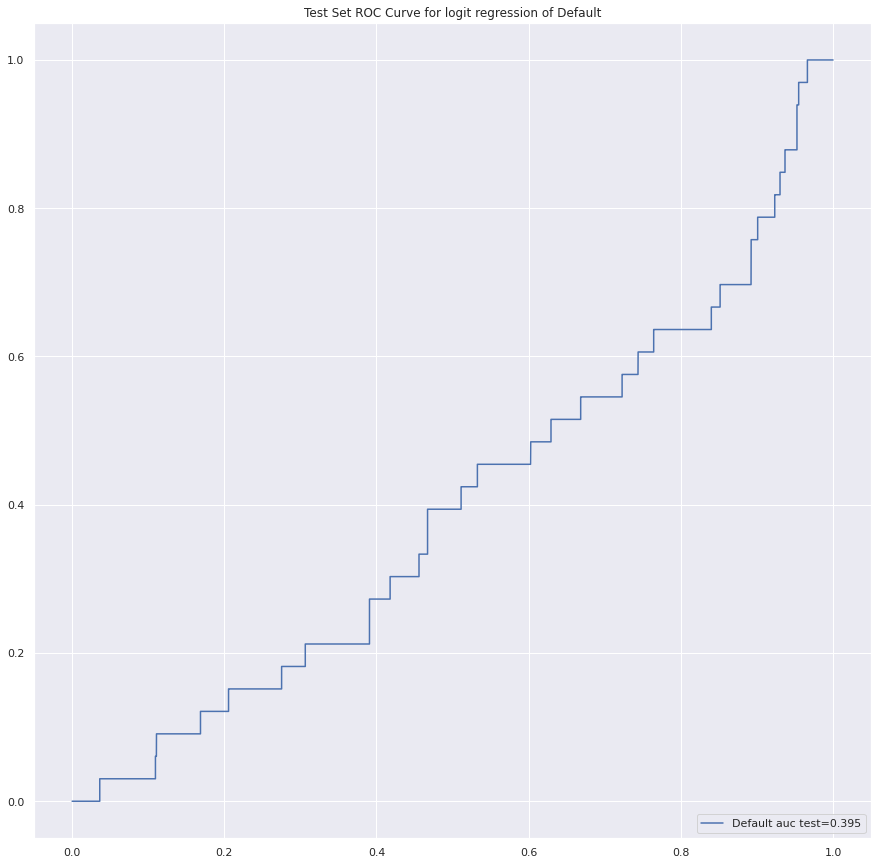

Linearity assumption satisfied for independent variable column 0
Linearity assumption satisfied for independent variable column 1
Linearity assumption satisfied for independent variable column 2
Linearity assumption not satisfied for independent variable column 3
Linearity assumption satisfied for independent variable column 4
Linearity assumption satisfied for independent variable column 5
Linearity assumption satisfied for independent variable column 6
Linearity assumption satisfied for independent variable column 7
Linearity assumption satisfied for independent variable column 8
Linearity assumption satisfied for independent variable column 9
Linearity assumption satisfied for independent variable column 10
Linearity assumption satisfied for independent variable column 11
Linearity assumption satisfied for independent variable column 12
                          Probit Regression Results                           
Dep. Variable:              Default_Y   No. Observations:            

In [ ]:
probit_regression(X2, "Default")

In [ ]:
X2.columns

Index(['CODE_GENDER_M', 'FLAG_OWN_REALTY_Y',
       'NAME_EDUCATION_TYPE_Higher education', 'NAME_FAMILY_STATUS_Married',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment',
       'OCCUPATION_TYPE_SOPHISTICATED LABOR', 'GOT_LOAN_Y', 'AMT_INCOME_TOTAL',
       'YEARS_BIRTH', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS'],
      dtype='object')